In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Load all sheets
file_path = r'C:\Users\user\Desktop\Data_Analyst\TDN_Network\TDN_Alpha_and_Access\AI_Showcase_Virtual_Conf_Full_attendee_list.xlsx'

excel_file = pd.ExcelFile(file_path)
print(excel_file.sheet_names)

['Full list of attendees', 'Companies seeking AI automation', 'AI freelancers & agencies for a', 'AI investors', 'AI startups']


In [93]:
all_sheets = pd.read_excel(file_path, sheet_name=None)

df_attendees = all_sheets['Full list of attendees']
df_companies = all_sheets['Companies seeking AI automation']
df_freelancers = all_sheets['AI freelancers & agencies for a']
df_investors = all_sheets['AI investors']
df_startups = all_sheets['AI startups']


In [94]:
df_attendees = all_sheets['Full list of attendees']

# Look for "Founder", "Co-founder", or similar in any of the likely title fields
founders_df = df_attendees[
    df_attendees['Business owner / CEO / Director'].astype(str).str.contains('founder', case=False, na=False)
]

# Filter Founders and Co.
founders_df = df_attendees[df_attendees['Business owner / CEO / Director'].notna()]

# Extract Founders’ Needs into a Structured Format
def compile_needs(row):
    needs = []
    if pd.notna(row['Processes looking to be automated with AI']):
        needs.append("Process Automation")
    if row.get('Interested in AI automation services for the company\n(391)') == "Yes":
        needs.append("AI Services")
    if row.get('Interested in educating their team on using AI in their job\n(333)') == "Yes":
        needs.append("Team AI Education")
    if row.get('Interested in taking an AI automation course themselves\n(402)') == "Yes":
        needs.append("Personal AI Training")
    return needs

founders_df['founders_needs'] = founders_df.apply(compile_needs, axis=1)

need_columns = [
    'Processes looking to be automated with AI',
    'Interested in AI automation services for the company\n(391)',
    'Interested in educating their team on using AI in their job\n(333)',
    'Interested in taking an AI automation course themselves\n(402)'
]

founders_needs = founders_df[['Name', 'Company Name', 'Business owner / CEO / Director'] + need_columns]

In [95]:
founders_needs['Wants_Service'] = founders_needs['Interested in AI automation services for the company\n(391)'].notna()
founders_needs['Wants_Team_Education'] = founders_needs['Interested in educating their team on using AI in their job\n(333)'].notna()
founders_needs['Wants_Personal_Course'] = founders_needs['Interested in taking an AI automation course themselves\n(402)'].notna()


summary = {
    'Wants_Service': founders_needs['Wants_Service'].sum(),
    'Wants_Team_Education': founders_needs['Wants_Team_Education'].sum(),
    'Wants_Personal_Course': founders_needs['Wants_Personal_Course'].sum()
}

print("Summary of Founder Needs:")
print(summary)

founders_needs.to_excel('Cleaned_Data/founders_needs_summary.xlsx', index=False)


C:\Users\user\AppData\Local\Temp\ipykernel_7204\2955853571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  founders_needs['Wants_Service'] = founders_needs['Interested in AI automation services for the company\n(391)'].notna()
C:\Users\user\AppData\Local\Temp\ipykernel_7204\2955853571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  founders_needs['Wants_Team_Education'] = founders_needs['Interested in educating their team on using AI in their job\n(333)'].notna()
C:\Users\user\AppData\Local\Temp\ipy

Summary of Founder Needs:
{'Wants_Service': np.int64(2458), 'Wants_Team_Education': np.int64(2458), 'Wants_Personal_Course': np.int64(2458)}


In [96]:
def get_primary_need(row):
    if row['Wants_Service'] == 1:
        return 'AI Service'
    elif row['Wants_Team_Education'] == 1:
        return 'Team Training'
    elif row['Wants_Personal_Course'] == 1:
        return 'Personal Upskilling'
    elif pd.notna(row['Processes looking to be automated with AI']) and str(row['Processes looking to be automated with AI']).strip() != '':
        return 'Process Automation'
    else:
        return 'Unspecified'

founders_needs['Primary_Need'] = founders_needs.apply(get_primary_need, axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_7204\3393478023.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  founders_needs['Primary_Need'] = founders_needs.apply(get_primary_need, axis=1)


- INVESTORS — Categorize by Investment Interests

In [97]:
# Load startup stage columns

investment_columns = [
    'Looking to invest in Pre-seed Startups\n(198)',
    'Looking to invest in Seed Startups\n(226)',
    'Looking to invest in Series A Startups\n(115)',
    'Looking to invest in Series B Startups\n(51)',
    'Looking to invest in Series C+ Startups\n(5)'
]

df_investors_filtered = df_investors[['Name', 'Email', 'Company Name'] + investment_columns]

# Add a column for investment stage focus

def classify_investor(row):
    if row['Looking to invest in Series C+ Startups\n(5)'] == 1:
        return 'Series C+'
    elif row['Looking to invest in Series B Startups\n(51)'] == 1:
        return 'Series B'
    elif row['Looking to invest in Series A Startups\n(115)'] == 1:
        return 'Series A'
    elif row['Looking to invest in Seed Startups\n(226)'] == 1:
        return 'Seed'
    elif row['Looking to invest in Pre-seed Startups\n(198)'] == 1:
        return 'Pre-seed'
    else:
        return 'Unspecified'

df_investors_filtered['Focus Stage'] = df_investors_filtered.apply(classify_investor, axis=1)

# 

df_investors_filtered.to_excel('Cleaned_Data/investor_categories.xlsx', index=False)
print(df_investors_filtered['Focus Stage'].value_counts())

C:\Users\user\AppData\Local\Temp\ipykernel_7204\2507835960.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_investors_filtered['Focus Stage'] = df_investors_filtered.apply(classify_investor, axis=1)


Focus Stage
Seed           127
Series A        66
Series B        48
Series C+        5
Unspecified      3
Name: count, dtype: int64


- STARTUPS — Categorize by Fundraising Stage

In [98]:
# Load startup stage columns

df_startups = all_sheets['AI startups']

startup_stage_columns = [
    'Bootstrapped\n(195)',
    'Pre-seed\n(109)',
    'Seed\n(149)',
    'Series A\n(8)',
    'Series B\n(8)',
    'Series C+\n(3)'
]

df_startups_filtered = df_startups[['Name', 'Email', 'Company Name'] + startup_stage_columns]

# Categorize fundraising stage

def classify_startup(row):
    if row['Series C+\n(3)'] == 1:
        return 'Series C+'
    elif row['Series B\n(8)'] == 1:
        return 'Series B'
    elif row['Series A\n(8)'] == 1:
        return 'Series A'
    elif row['Seed\n(149)'] == 1:
        return 'Seed'
    elif row['Pre-seed\n(109)'] == 1:
        return 'Pre-seed'
    elif row['Bootstrapped\n(195)'] == 1:
        return 'Bootstrapped'
    else:
        return 'Unspecified'

df_startups_filtered['Stage'] = df_startups_filtered.apply(classify_startup, axis=1)

df_startups_filtered.to_excel('Cleaned_Data/startup_categories.xlsx', index=False)
print(df_startups_filtered['Stage'].value_counts())



C:\Users\user\AppData\Local\Temp\ipykernel_7204\715845101.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_startups_filtered['Stage'] = df_startups_filtered.apply(classify_startup, axis=1)


Stage
Bootstrapped    152
Seed            147
Series B          8
Series A          7
Series C+         3
Unspecified       2
Name: count, dtype: int64


- Match Investors to Startups Based on Stage

In [99]:
# Make sure the dataframes are clean
investors = df_investors_filtered[['Name', 'Email', 'Company Name', 'Focus Stage']].rename(columns={
    'Name': 'Investor Name',
    'Email': 'Investor Email',
    'Company Name': 'Investor Company'
})

startups = df_startups_filtered[['Name', 'Email', 'Company Name', 'Stage']].rename(columns={
    'Name': 'Startup Name',
    'Email': 'Startup Email',
    'Company Name': 'Startup Company'
})

# Match investors to startups based on stage
matched_investor_startups = pd.merge(
    startups,
    investors,
    left_on='Stage',
    right_on='Focus Stage',
    how='inner'
)

# Preview matches
matched_investor_startups.head()


,Startup Name,Startup Email,Startup Company,Stage,Investor Name,Investor Email,Investor Company,Focus Stage
0,Marco Franciosa,marco@franciosa.it,Codename AGAIN - AI to transform audio enterta...,Seed,Mike Schatzman,NaN,VC,Seed
1,Marco Franciosa,marco@franciosa.it,Codename AGAIN - AI to transform audio enterta...,Seed,Rafael Igual,NaN,LATAM AI HUB Ventures @ AI-Native Venture Studio,Seed
2,Marco Franciosa,marco@franciosa.it,Codename AGAIN - AI to transform audio enterta...,Seed,Rajiv Mathew,NaN,Oracle Program Head,Seed
3,Marco Franciosa,marco@franciosa.it,Codename AGAIN - AI to transform audio enterta...,Seed,Priya Abraham,NaN,Vaeliou delivers comprehensive founder intelli...,Seed
4,Marco Franciosa,marco@franciosa.it,Codename AGAIN - AI to transform audio enterta...,Seed,Ron Myers,ron@islandcapital.vc,Early stage venture capital investor,Seed


In [100]:
matched_investor_startups.to_excel('Cleaned_Data/matched_investors_to_startups.xlsx', index=False)


- Match Freelancers/Agencies to Startups or Founders

In [101]:
# Filter Freelancers Offering Services

df_freelancers = all_sheets['AI freelancers & agencies for a']

freelancers = df_freelancers[
    df_freelancers['Interested in AI automation services for the company\n(70)'] == 1
][['Name', 'Email', 'Company Name', 'AI tools used to automate client processes']]

# Match to Founders Startups who Want Services
founders_wanting_services = founders_needs[founders_needs['Wants_Service'] == 1][['Name', 'Company Name']]

# Match to Startups who Want Services
startups_wanting_services = df_startups[
    df_startups['Interested in AI automation services for the company\n(125)'] == 1
][['Name', 'Company Name']]



- Cross Join and Recommend Freelancers

In [102]:
# Add key for cross join
freelancers['key'] = 1
founders_wanting_services['key'] = 1

# Match founders to freelancers
matches_founders_freelancers = pd.merge(founders_wanting_services, freelancers, on='key')
matches_founders_freelancers = matches_founders_freelancers.drop(columns='key')

matches_founders_freelancers.to_excel('Cleaned_Data/founders_freelancers_matches.xlsx', index=False)


- Founders’ Primary Needs

C:\Users\user\AppData\Local\Temp\ipykernel_7204\4213724930.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Need', data=needs_df, palette='coolwarm')


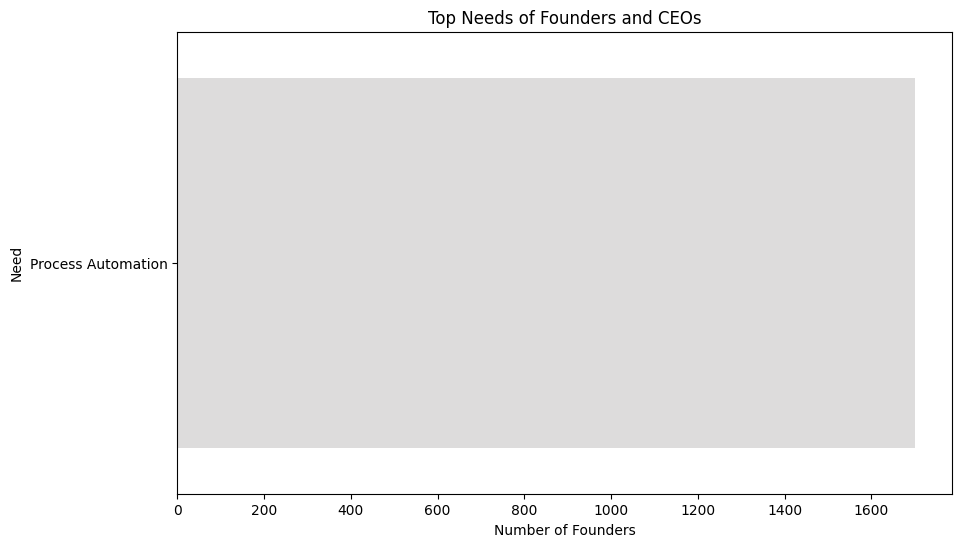

In [103]:
# Count all needs
all_needs = Counter([need for sublist in founders_df['founders_needs'] for need in sublist])

# Convert to DataFrame
needs_df = pd.DataFrame(all_needs.items(), columns=['Need', 'Count']).sort_values(by='Count', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Need', data=needs_df, palette='coolwarm')
plt.title('Top Needs of Founders and CEOs')
plt.xlabel('Number of Founders')
plt.ylabel('Need')

# Save to images folder
plt.savefig("images/founders_needs.png", bbox_inches='tight')
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_7204\2938961773.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=founders_needs, x='Primary_Need', order=founders_needs['Primary_Need'].value_counts().index, palette='viridis')


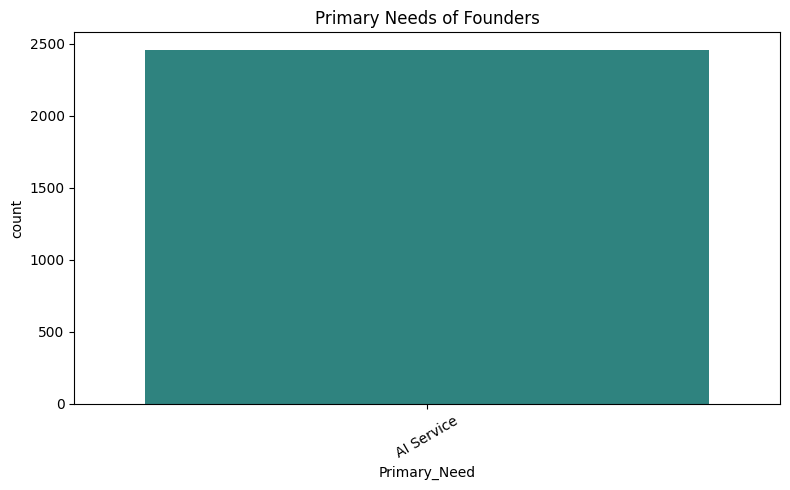

In [104]:
# Plot founder need categories
plt.figure(figsize=(8, 5))
sns.countplot(data=founders_needs, x='Primary_Need', order=founders_needs['Primary_Need'].value_counts().index, palette='viridis')
plt.title('Primary Needs of Founders')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('images/founders_primary_needs.png')

C:\Users\user\AppData\Local\Temp\ipykernel_7204\1400478089.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_investors_filtered, x='Focus Stage', order=df_investors_filtered['Focus Stage'].value_counts().index, palette='magma')


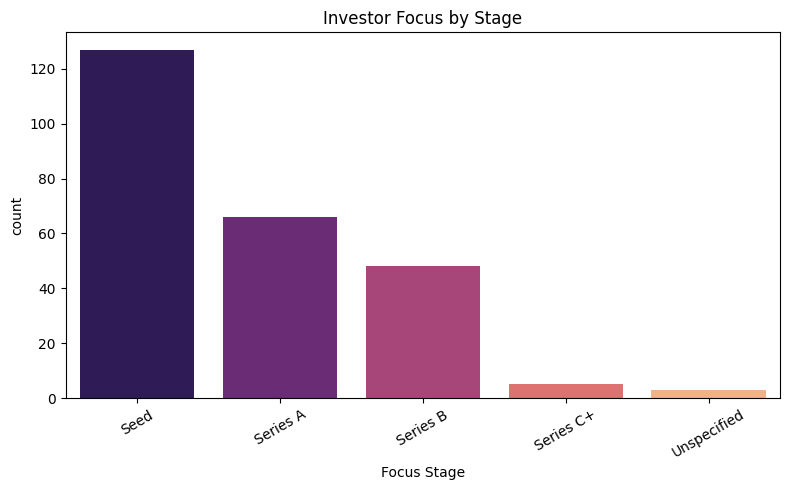

In [105]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_investors_filtered, x='Focus Stage', order=df_investors_filtered['Focus Stage'].value_counts().index, palette='magma')
plt.title('Investor Focus by Stage')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('images/investor_focus_stage.png')

C:\Users\user\AppData\Local\Temp\ipykernel_7204\1189988630.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_startups_filtered, x='Stage', order=df_startups_filtered['Stage'].value_counts().index, palette='coolwarm')


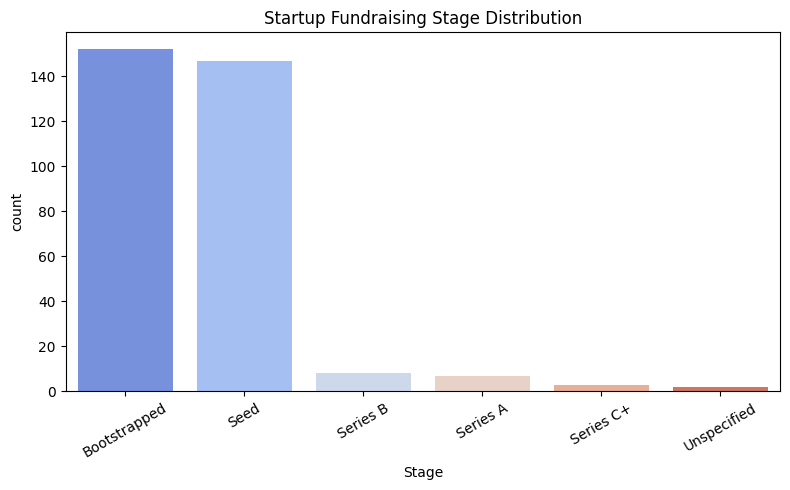

In [106]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_startups_filtered, x='Stage', order=df_startups_filtered['Stage'].value_counts().index, palette='coolwarm')
plt.title('Startup Fundraising Stage Distribution')
plt.xticks(rotation=30)
plt.tight_layout()
plt.savefig('images/startup_stages.png')

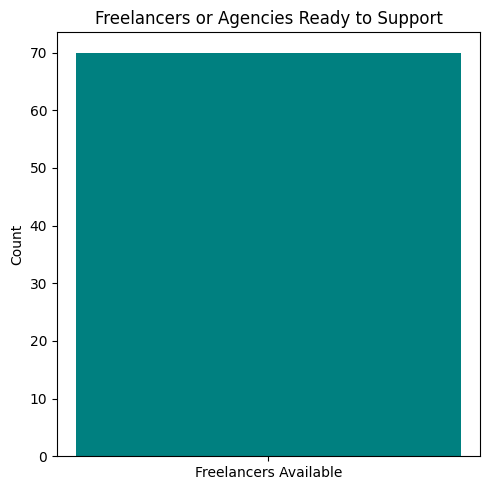

In [107]:
freelancers_count = freelancers.shape[0]

plt.figure(figsize=(5, 5))
plt.bar(['Freelancers Available'], [freelancers_count], color='teal')
plt.title('Freelancers or Agencies Ready to Support')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('images/freelancers_available.png')